1.2310643066039624 7.113056855275467e-05 0.8041731240690193


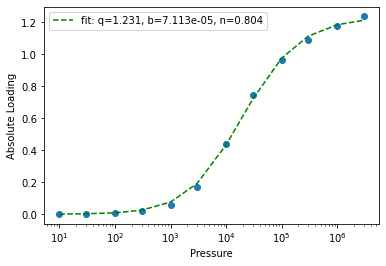

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def Toth(P, q, b, n):
    return q * b * P / pow(1 + pow(b*P,n),(1.0/n))

df = pd.read_csv('./Results.dat-BEA-Repeat-552K-nC7.csv', sep=',')
popt, pcov = curve_fit(Toth, df['P'].values, df['L'].values, p0=(1.0,1.0,1.0), bounds=([0,1.0E-20,0.1],[100,1.0E+20,10.0]))
print(*popt)

# plot fit
plt.xscale('log')
plt.scatter(df['P'], df['L'], clip_on=False)
plt.plot(df['P'], Toth(df['P'], *popt), 'g--', label='fit: q=%5.3f, b=%5.3e, n=%5.3f' % tuple(popt))
plt.xlabel('Pressure')
plt.ylabel('Absolute Loading')
plt.legend(loc='upper left')
plt.show()